In [37]:
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, exp, sin, cos
from math import gcd
import pandas as pd
import matplotlib as mpl
from pathlib import Path
from floquet_simulations.flux_functions import *
from floquet_simulations.plot_functions import PlotParams
from floquet_simulations.hamiltonians import ConvertComplex

PlotParams()

def unique(a):
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T

def round2(i):
    return np.round(i,2)

def FloatToStringSave(a):
    return str(a).replace(".", "p")

omega0=8
alpha=1
beta=1

df_dir = Path().absolute().parent.parent/"paper_data"/f"Heff_omega={omega0},alpha={alpha},beta={beta},phi3=0.csv"
print(df_dir)



# dataLoc = "D:/Data/Set13-alpha=1,beta=2,omega=9/"
# dfO = pd.read_csv(dataLoc+"Summaries/FT-Min.csv",
                          # index_col=False)#


dfO = pd.read_csv(df_dir,
                  index_col=False,
                   converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex,
                                  # "HE-J12": ConvertComplex,
                                  # "HE-J23": ConvertComplex,
                                  # "HE-J31": ConvertComplex,
                                  # "HE-O1": ConvertComplex,
                                  # "HE-O2": ConvertComplex,
                                  # "HE-O3": ConvertComplex
                   }
                  )

from scipy.special import jn_zeros
print(jn_zeros(0,1)[0]*8)


/home/gnixon/floquet-simulations/paper_data/Heff_omega=8,alpha=1,beta=1,phi3=0.csv
19.238604461566183


/home/gnixon/.cache/pypoetry/virtualenvs/floquet-simulations-srXSFrPT-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


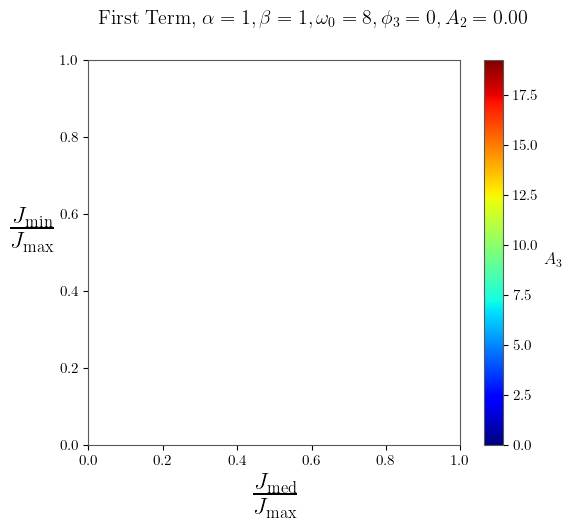

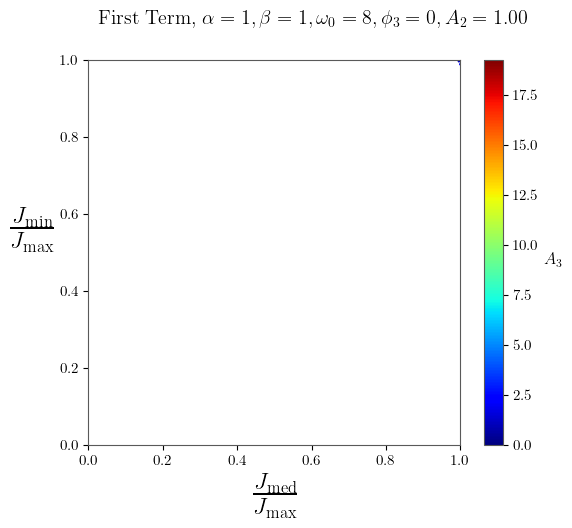

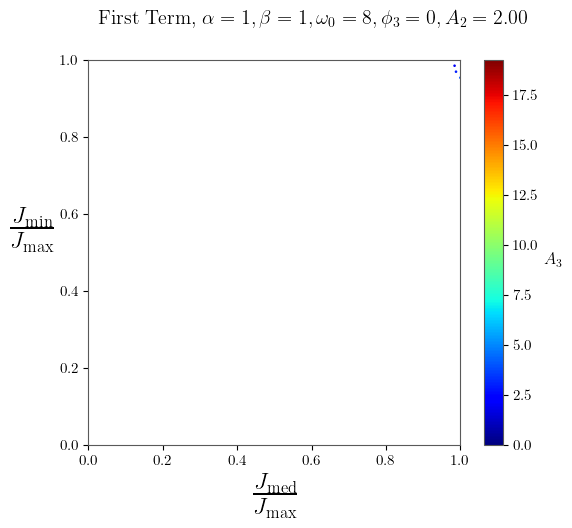

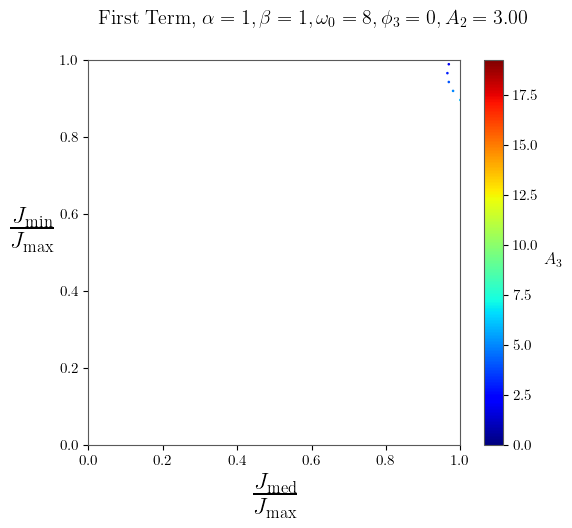

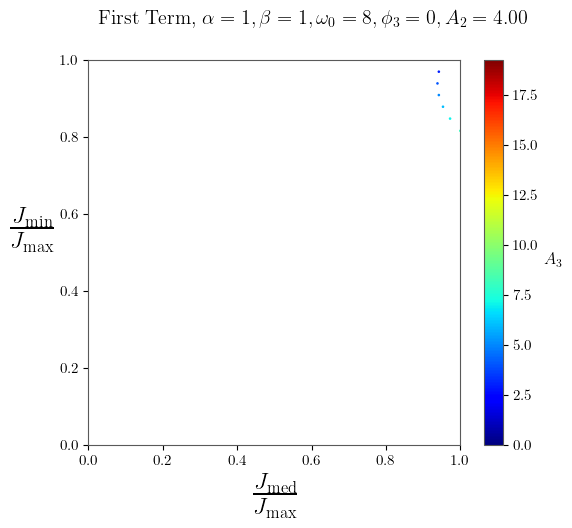

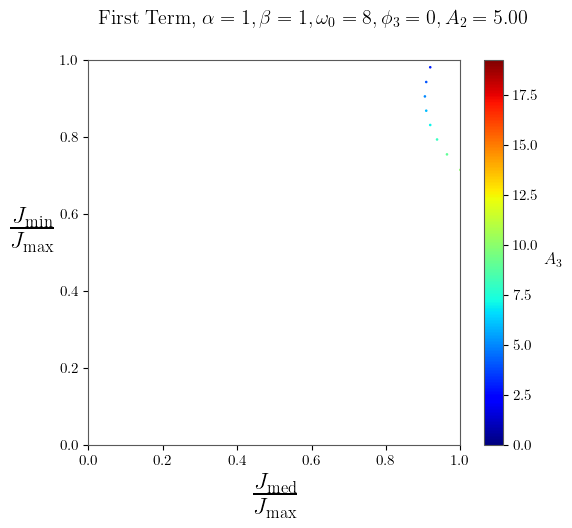

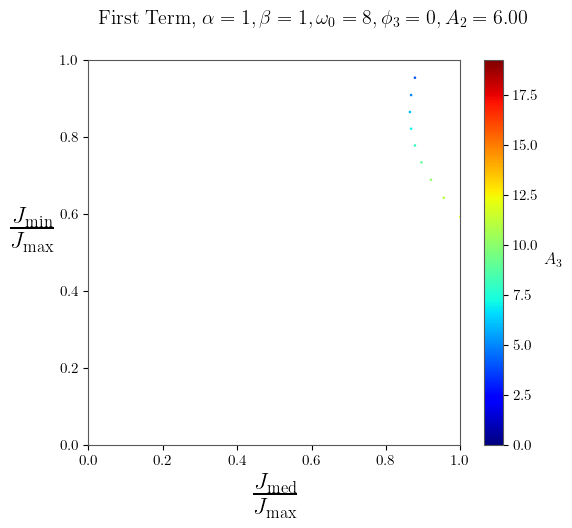

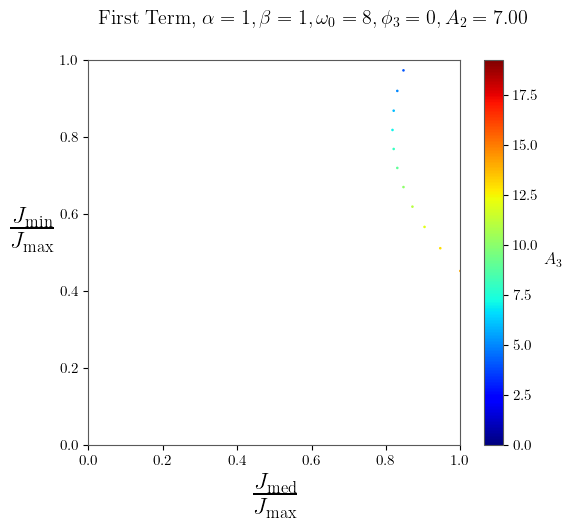

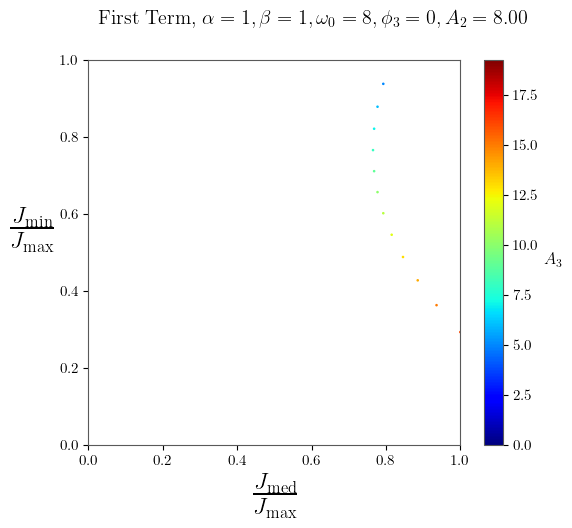

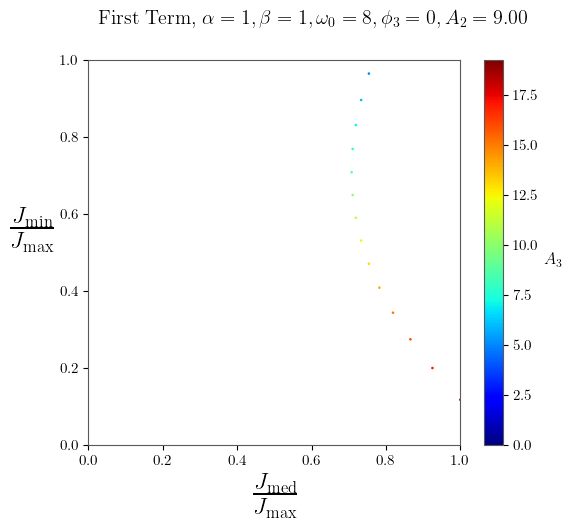

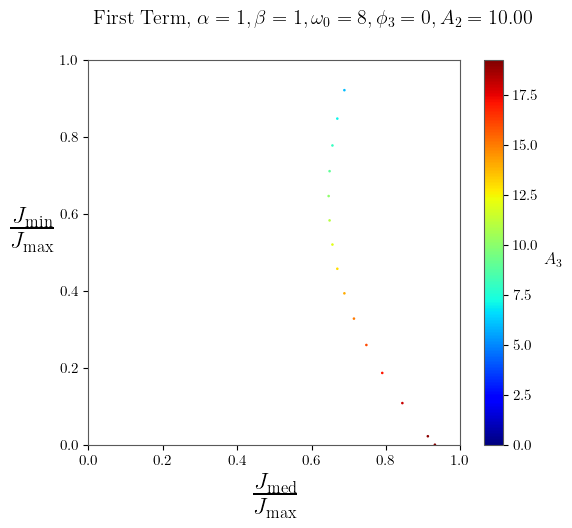

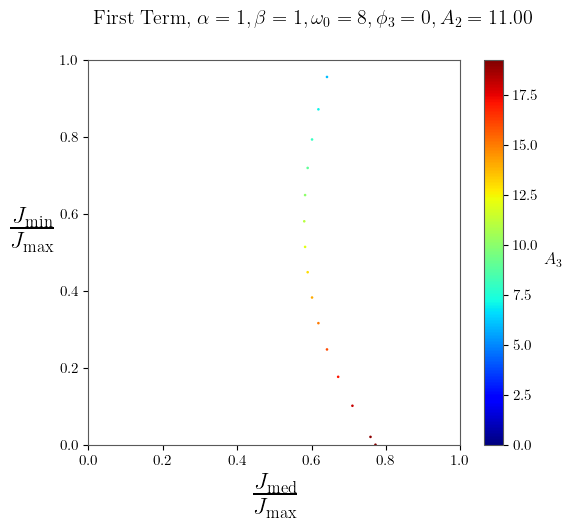

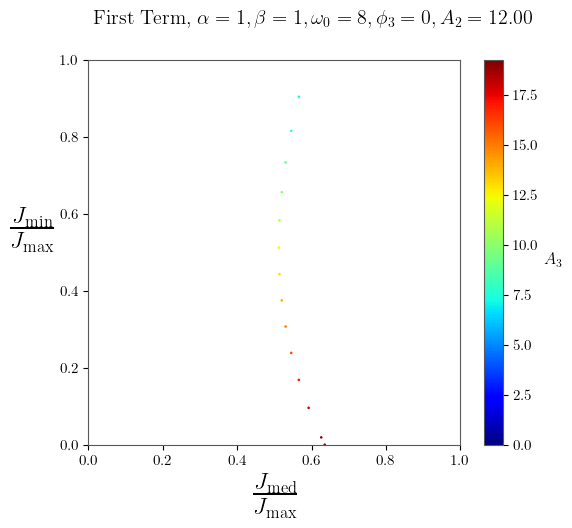

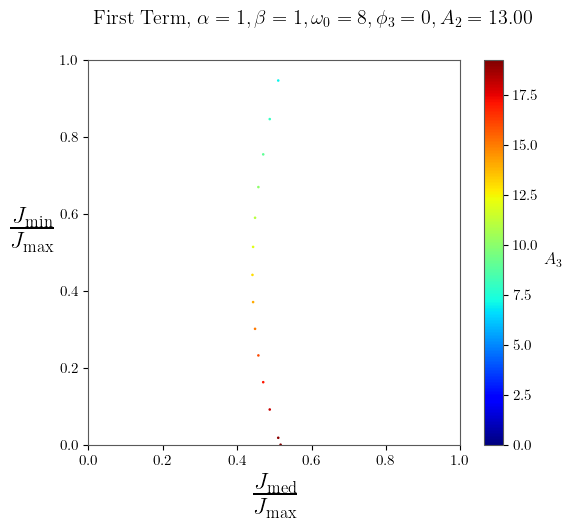

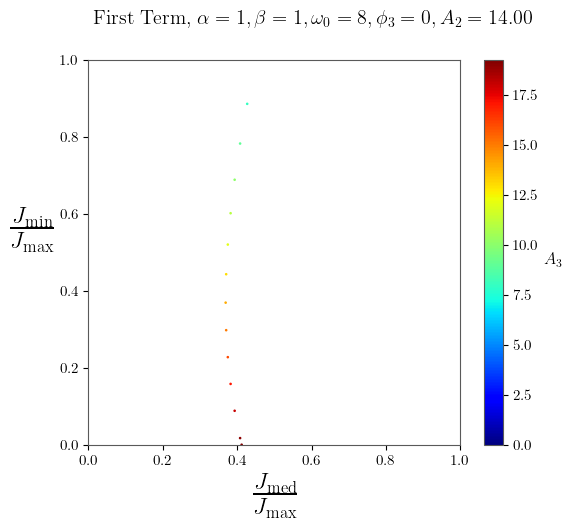

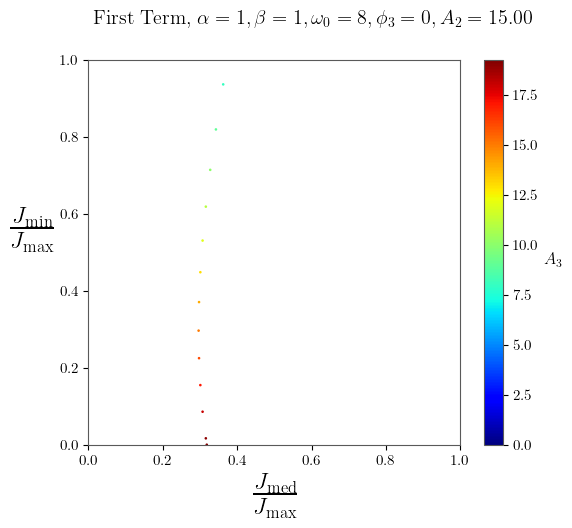

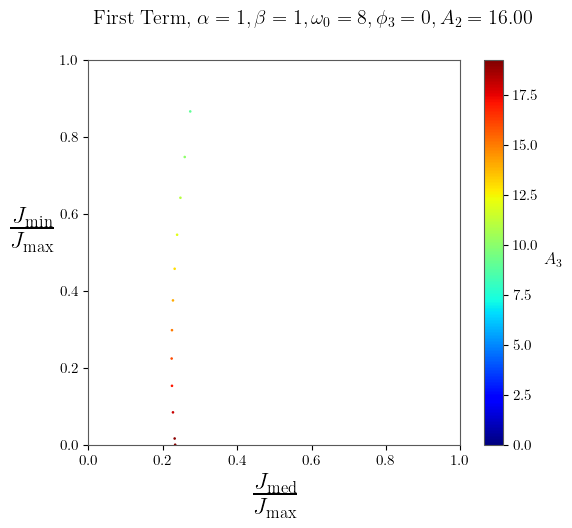

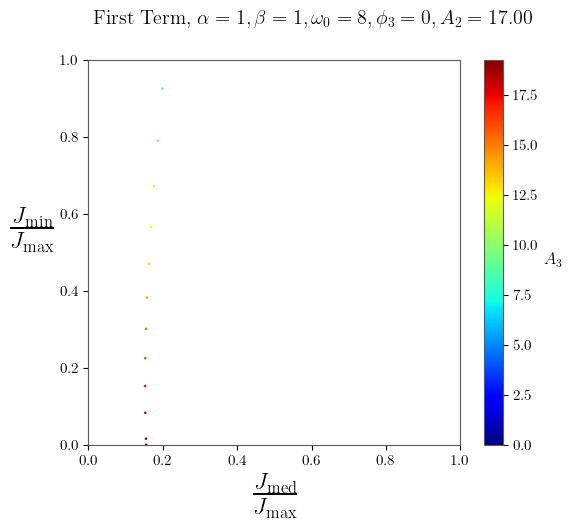

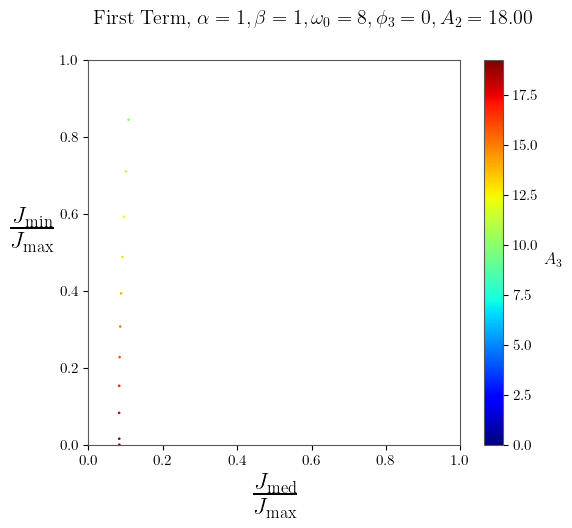

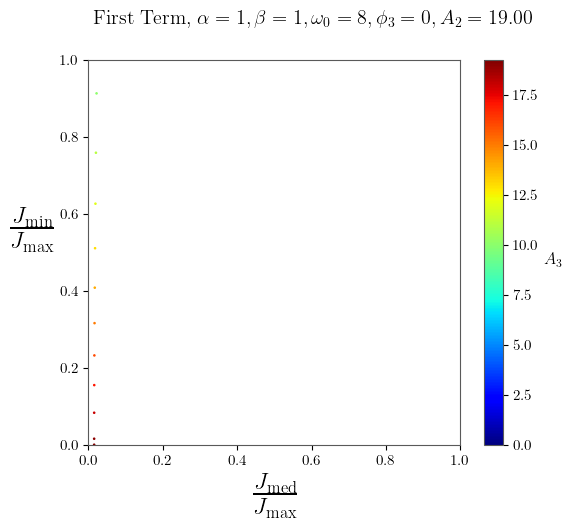

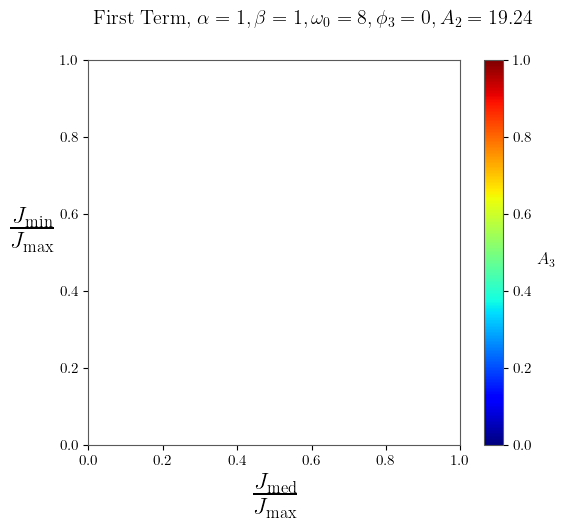

In [38]:
"""
2) Plot showing values in lower triangle, non accumulative
"""

# saveFig = ("C:/Users/"+place+"/OneDrive - University of Cambridge/MBQD/Figs"+
#            "/ShakingTriangle/Relative Hopping Triangle/V3/"+
#            "alpha=1,beta=2,omega0=9,NonAccum,FT/")

# saveFig = ("D:/Data/Merges/alpha=1,beta=2,omega=8,0-40/FT/reltriangleplots"+
#            "/phi3=0,mincovering2/")
save_fig_dir = f"/home/gnixon/floquet-simulations/figures/gif_frames/"

color_var = "A3"
time_var = "A2"

if time_var=="A3":
    time_var_list = np.append(np.linspace(0,19,20), [round(jn_zeros(0,1)[0]*omega0, 6)])
    #color var = A2 so
    color_var_min = 0
    color_var_max = jn_zeros(0,1)[0]*omega0
elif time_var == "A2":
    time_var_list = np.append(np.linspace(0,19,20), [round(jn_zeros(0,1)[0]*omega0, 6)])
    color_var_min = 0
    color_var_max = jn_zeros(0,1)[0]*omega0


alpha = 1; beta = 1; omega0=8; phi3=0
type_calc = "FT"
title_type = "First Term"

# for i, A3 in enumerate(np.linspace(0, 30.95, 620)):
for i, time_var_i in enumerate(time_var_list):
    time_var_i = np.round(time_var_i, 3)
  
    
    dfP = dfO[
        # (dfO.beta == beta)
             # &(dfO.alpha == alpha)
               # &(dfO.omega0 == omega0)
             (dfO[time_var] == time_var_i)
             &(dfO[color_var] <=color_var_max)
             &(dfO[color_var] >= color_var_min)
                # &(dfO["phi3/pi"]==phi3)
                      ]
    
    dfP = dfP.sort_values(by=[color_var])
    
    
    # xLT = dfP[type_calc+"-LowerT.X"]
    # yLT = dfP[type_calc+"-LowerT.Y"] 
    xLT = dfP["FT-J12"]/dfP["FT-J23"]
    yLT = dfP["FT-J31"]/dfP["FT-J23"]
    
    
    fig, ax = plt.subplots(figsize=(6,5))
    sc = ax.scatter(xLT, yLT, s=3, c=dfP[color_var].to_numpy(), 
                    cmap="jet", marker=".")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel(r"$\frac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$", 
                  fontsize = 24)
    ax.set_ylabel(r"$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$", 
                  rotation = 0, fontsize = 24,  labelpad = 20)
    cbar = plt.colorbar(sc)
    title = (title_type + r", $\alpha=" + str(alpha) + r", \beta="+str(beta)
             + r", \omega_0=" + str(omega0) 
             + r", \phi_3 "
              + r"= 0 "
             # + r" \in \{0, 2 \pi \}"             
             r",A_2="+f'{time_var_i:.2f}'
             # str(round(A3,2)) 
             + r"$")
    plt.suptitle(title)
    cbar.ax.set_ylabel(r"$A_3$", rotation=0, labelpad=10)
    plt.savefig(save_fig_dir+f"take2/Frame{i}.png", format='png', bbox_inches='tight')
    plt.show()


In [ ]:

"""
2) Plot showing values in lower triangle, non accumulative
"""

saveFig = ("C:/Users/"+place+"/OneDrive - University of Cambridge/MBQD/Figs"+
           "/ShakingTriangle/Relative Hopping Triangle/V3/"+
           "alpha=1,beta=2,omega0=9,NonAccum,FT/")

saveFig = ("D:/Data/Merges/alpha=1,beta=2,omega=8,0-40/FT/reltriangleplots"+
           "/phi3=0,mincovering2/")

color_var = "A2"
time_var = "A3"


alpha = 1; beta = 2; omega0=8; phi3=0
type_calc = "FT"
title_type = "First Term"

# for i, A3 in enumerate(np.linspace(0, 30.95, 620)):
for i, A3 in enumerate(np.linspace(37, 38.5, 31)):
    A3 = np.round(A3, 3)
  
    
    dfP = dfO[
        # (dfO.beta == beta)
             # &(dfO.alpha == alpha)
               # &(dfO.omega0 == omega0)
             (dfO.A3 == A3)
             &(dfO.A2 <=18.50)
                # &(dfO["phi3/pi"]==phi3)
                      ]
    
    dfP = dfP.sort_values(by=['A2'])
    
    
    xLT = dfP[type_calc+"-LowerT.X"]
    yLT = dfP[type_calc+"-LowerT.Y"] 
    
    
    fig, ax = plt.subplots(figsize=(6,5))
    sc = ax.scatter(xLT, yLT, s=3, c=dfP.A2.to_numpy(), cmap="jet", marker=".")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel(r"$\frac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$", fontsize = 24)
    ax.set_ylabel(r"$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$", rotation = 0, fontsize = 24,  labelpad = 20)
    cbar = plt.colorbar(sc)
    title = (title_type + r", $\alpha=" + str(alpha) + r", \beta="+str(beta)
             + r", \omega_0=" + str(omega0) 
             + r", \phi_3 "
              + r"= 0 "
             # + r" \in \{0, 2 \pi \}"             
             r",A_3="+f'{A3:.2f}'
             # str(round(A3,2)) 
             + r"$")
    plt.suptitle(title)
    cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
    plt.savefig(saveFig+"Frame"+str(i)+".png", format='png', bbox_inches='tight')
    plt.show()


In [ ]:

"""
Plot showing values in lower triangle accumulative - First Term
"""


saveFig = ("C:/Users/"+place+"/OneDrive - University of Cambridge/MBQD/Figs"+
           "/ShakingTriangle/Relative Hopping Triangle/V3/"+
           "alpha=1,beta=2,omega0=9,phi3=0,NonAccum,FT/")

alpha = 1; beta = 2; omega0=9; phi=0

for i, A3max in enumerate(np.linspace(0,30.95,620)):
    # print(i)
    A3max =  np.round(A3max, 2)
    fig, ax = plt.subplots(figsize=(6,5))

    for A3 in np.linspace(0, A3max, i+1):
        
        # print("    ", A2)
        A3 =  np.round(A3, 2)
        dfP = dfO[
            # (dfO.beta == beta)
                          # &(dfO.alpha == alpha)
                          # &(dfO.omega0 == omega0)
                            (dfO.A3 == A3)
                            # &(dfO["phi3/pi"]==phi)
                          ]
        
        dfP = dfP.sort_values(by=['A3'])
        xLT = dfP["HE-LowerT.X"]
        yLT = dfP["HE-LowerT.Y"] 
        sc = ax.scatter(xLT, yLT, s=3, c=dfP.A2.to_numpy(), cmap="jet", marker=".")
        
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    cbar = plt.colorbar(sc)
    title = (r"Stroboscopic, $\alpha="+str(alpha)+r", \beta="+str(beta)+
              r", \omega_0="+str(omega0)+
              # r", \phi_3="+str(phi3)+r"\pi"
             r", A_3="+str(A3max)
             + r", \phi_3 \in \{0, 2 \pi\} "
             +r"$")
    plt.suptitle(title)
    cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
    plt.savefig(saveFig+"Frame"+str(i)+".png", format='png', bbox_inches='tight')
    plt.show()